In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
# %load_ext autotime

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os as os
import sys
sys.path.append('./extraction_functions') #this is where we put all the functions.py
sys.path.append('./../../functions_PVA') #this is where we put all the functions.py
#from brpylib import *

import matplotlib.pyplot as plt
from numpy               import arange


from extract_triggers import *

from save_load import *
import matplotlib.gridspec as gridspec
import itertools
import csv as csv


# Load Measurement times

In [3]:
MYOPIA=False

Mtimes = []
Trigs = []

fs=20000

exp=101
nmeas=7

time_elapsed = 0
for meas in np.arange(nmeas)+1:
#for meas in [7,1,2,5,4,3,6]:    #for experiment 102
    
    rootF= '/media/samuele/Samuele_01/Salamander1/pckls_triggers/'
    #this is the folder of the trigs
    if MYOPIA:
        rootF= rootf + '/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/exp_sorted/MYOPIA/Triggers/'

    trigs,ttot= load_obj(rootF + 'exp'+str(exp)+'-meas_0' + str(meas) + '_triggers_unfilt')
    
    Trigs.append(time_elapsed+trigs/fs)
    Mtimes.append(time_elapsed)
    
    time_elapsed+=ttot
Mtimes.append(time_elapsed)

# Load results from MATLAB

In [4]:
from scipy.io import loadmat

exp=17

meas=5

Folder = '/media/eqs8/Samuele_01/Exp_17/analysis/Check_5/'

try:
    matdata = loadmat(Folder + 'checkerboard.data_nocomp.checker.exp'+str(exp)+'_m'+str(meas))
except:
    matdata = loadmat(Folder + 'checkerboard.data_nocomp.checker.exp'+str(exp)) 


In [4]:
UNSORTED=False
MYOPIA=False

# lookup table
rootF ='/media/eqs8/Samuele_01/Exp_17/sorting/exp17-meas_01/exp17-meas_01.GUI/'
if MYOPIA:
    rootF =rootf+'/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/exp_sorted/MYOPIA/exp'+str(exp)+'/'
spike_clusters= load(rootF + 'spike_clusters.npy')  

import csv as csv
if not UNSORTED:
    cgf = open(rootF + 'cluster_group.tsv')  
    cgfr = csv.reader(cgf,delimiter="\t") 
    cluster_group = dict()
    next(cgfr)
    for row in cgfr:
        cluster_group[row[0]]=row[1]
if UNSORTED:
    Clusters = np.arange(len(np.unique(spike_clusters)))
else:
    Clusters =np.array(list(cluster_group.keys()),dtype='int')

i0=0
iz=len(Clusters)

if UNSORTED: iz = 336
#--------------------    
clusid = {}  
clus_count=1
#--------------------    
for i in np.arange(i0,iz):
    
    if UNSORTED:
        clus=i
    else:
        clus=Clusters[i]
    
        if cluster_group[str(clus)]=='mua' or cluster_group[str(clus)]=='noise':continue
    
    clusid[clus_count]=clus
    
    clus_count+=1
clusid

{1: 4,
 2: 13,
 3: 18,
 4: 19,
 5: 22,
 6: 30,
 7: 53,
 8: 57,
 9: 78,
 10: 83,
 11: 88,
 12: 89,
 13: 98,
 14: 113,
 15: 116,
 16: 117,
 17: 123,
 18: 127,
 19: 130,
 20: 136,
 21: 141,
 22: 145,
 23: 164,
 24: 172,
 25: 177,
 26: 178,
 27: 182,
 28: 191,
 29: 194,
 30: 195,
 31: 197,
 32: 200,
 33: 209,
 34: 210,
 35: 216,
 36: 233,
 37: 239,
 38: 260,
 39: 262,
 40: 264,
 41: 268,
 42: 270,
 43: 273,
 44: 285,
 45: 289,
 46: 290,
 47: 300,
 48: 312,
 49: 339,
 50: 349,
 51: 350,
 52: 364,
 53: 376,
 54: 388,
 55: 402,
 56: 412,
 57: 418,
 58: 428,
 59: 436,
 60: 450,
 61: 459,
 62: 467,
 63: 480,
 64: 499,
 65: 500,
 66: 508,
 67: 515,
 68: 532,
 69: 534,
 70: 541,
 71: 543,
 72: 553,
 73: 561,
 74: 566,
 75: 567,
 76: 575,
 77: 579,
 78: 596,
 79: 606,
 80: 608,
 81: 622,
 82: 632,
 83: 636,
 84: 639,
 85: 641,
 86: 642,
 87: 668,
 88: 672,
 89: 680,
 90: 688,
 91: 696,
 92: 698,
 93: 706,
 94: 708,
 95: 720,
 96: 737,
 97: 739,
 98: 743,
 99: 753,
 100: 754,
 101: 759,
 102: 763,


In [6]:
clus_count-1,meas

(23, 2)

# Plot fitted gaussian and ellipse & RF STA

In [55]:
#Plot neuron
MYOPIA_txt = '_myopia'
MYOPIA_txt = ''

PLOT=True
SAVE =True

PDF_folder = '/media/eqs8/Samuele_01/Salamander2/RF_m2/'
#the folder where you want to save the RFs with the ellipse

RF_fit = {}
maxvalsRF={}

checksize=50
#if exp>10: checksize=60
#for id in np.arange(15,16):#[202]:
for id in list(clusid.keys())[:]:
    neuron=id-1
    print(clusid[id])
    coor=matdata['EllipseCoor'][:,neuron]
    
    [X,Y] = meshgrid(np.arange(checksize), np.arange(checksize))
    X = X - (checksize-coor[0])
    Y = Y - (checksize-coor[1])
    GRF = 1*np.exp(-(X**2)/coor[2] - (Y**2)/coor[3] - coor[4]*X*Y )
    #GRF=GRF[::-1,::-1]
    if PLOT:
        #-----------------
        fig=figure(figsize=(10,5))
        #-----------------

        ax=fig.add_subplot(1,2,1)
        
        
        ax.imshow(np.swapaxes(matdata['Spatial'][:,:,neuron],0,1))
        #ax.imshow(matdata['Spatial'][::-1,::-1,neuron])
        #ax.imshow(matdata['Spatial'][:,:,neuron])

        #ax.plot(checksize-coor[0],checksize-coor[1],'+',markersize=5,color='k')

        ax.set_xticks([])
        ax.set_yticks([])
        #ax.plot(checksize-matdata['Xell'][:,neuron],checksize-matdata['Yell'][:,neuron],'w',lw=1)
        ax.plot(matdata['Yell'][:,neuron]-1,matdata['Xell'][:,neuron]-1,'w',lw=1)

        #coor2:3 = sigma2
        ax.title.set_text('Cluster nb '+str(clusid[id] )+ ' STA')

        #-----------------

        ax=fig.add_subplot(1,2,2)
        ax.imshow(np.swapaxes(GRF,0,1)[::-1,::-1])

        #ax.plot(checksize-matdata['Xell'][:,neuron],checksize-matdata['Yell'][:,neuron],'w',lw=0.5)
        ax.plot(matdata['Yell'][:,neuron]-1,matdata['Xell'][:,neuron]-1,'w',lw=0.5)
        
        
        #ax.plot(checksize-coor[0],checksize-coor[1],'+',markersize=5,color='k')
        ax.plot(coor[1]-1,coor[0]-1,'+',markersize=5,color='k')
        ax.set_xticks([])
        ax.set_yticks([])
    
#     ax.title.set_text('Cluster nb '+str(clusid[id] )+ ' fit')
    
    
    #------------------------    
    #RF_fit[clusid[id]] = [[checksize-coor[0],checksize-coor[1]],[checksize-matdata['Xell'][:,neuron],checksize-matdata['Yell'][:,neuron]]]
    RF_fit[clusid[id]] = [[coor[1]-1,coor[0]-1],[matdata['Yell'][:,neuron]-1,matdata['Xell'][:,neuron]-1],np.swapaxes(matdata['Spatial'][:,:,neuron],0,1),matdata['Temporal'][:,neuron]]
    
    #maxvalsRF[clusid[id]] = 1/np.std((matdata['Spatial'][::-1,::-1,neuron])) 
    maxvalsRF[clusid[id]] = 1/np.std((matdata['Spatial'][:,:,neuron])) 
    print(maxvalsRF[clusid[id]])
        
    if PLOT:
        txtadd=''
        if UNSORTED: txtadd='_UNSORTED'
        if MYOPIA: 
            myop_txt = 'myopia_'
        else:
            myop_txt=''
        fsave = PDF_folder +'exp'+str(exp)+'_m'+str(meas)+'_clus' +str(clusid[id]) +'_RF_STA_check' +txtadd
    
        fig.savefig(fsave+'.png',format='png',dpi=110)
        close(fig)  
        
    i+=1
#------------------------           
# save RF_fit
if SAVE:
    saveF = '/media/eqs8/Samuele_01/Salamander2/RF_m2/'
    if UNSORTED:
        codename = 'exp'+str(exp)+'_m'+str(meas)+ '_RF_fit' + '_UNSORTED' + MYOPIA_txt
    else:
        codename = 'exp'+str(exp)+'_m'+str(meas)+ '_RF_fit' + MYOPIA_txt

    savef = saveF + codename  
    save_obj([RF_fit,maxvalsRF],savef)

109
20.627361746840812
197
5.076234500699425
999
20.50545914758202
1000
18.077088112091108
1009
13.745500229727531
1014
4.815971534283765
1018
14.388084982640693
1029
13.409521413020986
1042
21.657929688152347
1046
20.810188151189877
1047
4.342084758202742
1051
17.231942668849268
1055
15.144059815922429
1154
11.012579748335142
1165
7.459401741936021
1167
16.368197905957715
1178
18.714626848709724
1181
15.284237084622541
1182
23.44481017974538
1183
15.569849454897197
1184
14.995491930563103
1185
7.517104377555334
1186
17.360082479644618


In [16]:
meas

5

# Make LSTA s1000

In [5]:
#LAP4= False
UNSORTED=False

In [6]:
for LAP4 in [False]:

    if LAP4:
        lap4_txt = '_lap4'
    else:
        lap4_txt = ''

    pkls = []
    pknames = []
    pkcount=0

    pkldirs = '/media/samuele/Samuele_01/Exp_19/analysis/s1000/'

    #-----------------------------------------------
    # Here I load all the pickles names
    # we make the list of names, and the list of address to open
    #-----------------------------------------------

    pks = getfiles(startdir=pkldirs, phrase='.pkl', function='endswith')
    for pk in pks:

        if LAP4 and ('m8' in pk):
            pkls.append(pk)
        elif (not(LAP4) and ('m5' in pk)):
            pkls.append(pk)
        else:    
            continue

    pkls = sorted(pkls)
    print(len(pkls))

    for pk in pkls[:]:
        if UNSORTED:
            pknames.append((pk.split('/')[-1].split(lap4_txt+'_UNSORTED_s1000_times.pkl')[0]))
        else:
            pknames.append((pk.split('/')[-1].split(lap4_txt+'_s1000_times.pkl')[0]))


    pkcount = len(pkls)
    print(pkcount)   

    if LAP4:
        pkls4 =pkls
        
pknames


209
209


['exp19_m5_c0',
 'exp19_m5_c101',
 'exp19_m5_c102',
 'exp19_m5_c106',
 'exp19_m5_c107',
 'exp19_m5_c108',
 'exp19_m5_c109',
 'exp19_m5_c10',
 'exp19_m5_c114',
 'exp19_m5_c118',
 'exp19_m5_c11',
 'exp19_m5_c121',
 'exp19_m5_c122',
 'exp19_m5_c123',
 'exp19_m5_c125',
 'exp19_m5_c127',
 'exp19_m5_c128',
 'exp19_m5_c129',
 'exp19_m5_c130',
 'exp19_m5_c134',
 'exp19_m5_c137',
 'exp19_m5_c138',
 'exp19_m5_c140',
 'exp19_m5_c142',
 'exp19_m5_c143',
 'exp19_m5_c145',
 'exp19_m5_c146',
 'exp19_m5_c148',
 'exp19_m5_c153',
 'exp19_m5_c156',
 'exp19_m5_c157',
 'exp19_m5_c159',
 'exp19_m5_c15',
 'exp19_m5_c160',
 'exp19_m5_c162',
 'exp19_m5_c164',
 'exp19_m5_c165',
 'exp19_m5_c168',
 'exp19_m5_c16',
 'exp19_m5_c171',
 'exp19_m5_c173',
 'exp19_m5_c174',
 'exp19_m5_c175',
 'exp19_m5_c182',
 'exp19_m5_c184',
 'exp19_m5_c185',
 'exp19_m5_c190',
 'exp19_m5_c191',
 'exp19_m5_c193',
 'exp19_m5_c196',
 'exp19_m5_c198',
 'exp19_m5_c1',
 'exp19_m5_c200',
 'exp19_m5_c201',
 'exp19_m5_c202',
 'exp19_m5_c203',


In [7]:
exp=19
LAP4=False
date = '20210617-'

stim_index = 4 # measurement number -1

if LAP4: stim_index = 4 #exp1 and exp14 # measurement number -1     FOR LAP4
# We actually don't care for lap4 which stim index is because rasters are computed somewhere else
    

#-----------------------------------------------
# Here I load all the pertrubation folder
#-----------------------------------------------
if exp==17:
    patFolder = '/media/samuele/Samuele_01/Exp_17/stimuli/20210515-fipwrc_8imgs_1000reps_ml50_std25_amp32/patterns/'
if exp==19:
    patFolder = '/media/samuele/Samuele_01/Exp_19/stimulus/20210617-fipwrc_4imgsInv_1000reps_ml50_std25_amp32/patterns/'
#-----------------
# Get start times and make rasters
#-----------
# Get stim trials
stimF ='/media/samuele/Samuele_01/Exp_19/stimulus/20210617-fipwrc_4imgsInv_1000reps_ml50_std25_amp32/'

stim_trials_f= open(stimF + date+'fipwrc_trials.csv')
stim_trials_f = csv.reader(stim_trials_f,delimiter=",")

stim_trials=[]
for row in stim_trials_f:
    stim_trials.append(np.array(row))

stim_trials_head = stim_trials[0]
stim_trials = np.array(stim_trials[1:]).astype(double)
print(stim_trials_head)


#-----------
# Get conditions
stimF='/media/samuele/Samuele_01/Exp_19/stimulus/20210617-fipwrc_4imgsInv_1000reps_ml50_std25_amp32/'

stim_cond_f= open(stimF + '20210617-fipwrc_conditions.csv')
stim_cond_f = csv.reader(stim_cond_f,delimiter=",")

stim_cond={}
stim_pattern={}
c=0
for row in stim_cond_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        stim_cond[row[0]]= int(row[1])
        stim_pattern[row[0]]=int(row[2])

print(stim_cond_head)

#---------------------
# Get images start times and pert_nb

# pert_nb = np.zeros([8,1000])
# im_starts= np.zeros([8,1000])
im_patterns=np.zeros([8,1000])

im_count = np.zeros(8,dtype='int')

for stim in stim_trials:
    condition = int(stim[1])
    im_nb =  int(stim_cond[str(condition)])
    
    if exp==17 or exp==14:
        if im_nb==8: im_nb=0                      #image key8 to 1st position
        if im_nb==12: im_nb=7                    #image key12 to 8th position
    if exp==19:
        if im_nb==3: im_nb=0 
        if im_nb==5: im_nb=1
        if im_nb==8: im_nb=2
        if im_nb==12: im_nb=3
        if im_nb==9003: im_nb=4
        if im_nb==9005: im_nb=5
        if im_nb==9008: im_nb=6
        if im_nb==9012: im_nb=7
    
    pattern = int(stim_pattern[str(condition)])

#     im_starts[im_nb,im_count[im_nb]] = stim[2]

    im_patterns[im_nb,im_count[im_nb]]= pattern
    
    im_count[im_nb]+=1


['' 'condition_nb' 'start_display_nb' 'end_display_nb']
['', 'image_nb', 'pattern_nb']


In [20]:
PDF_folder = '/media/samuele/Samuele_01/Exp_19/analysis/trial/'

LAP4=False
PLOT=False
ZOOM = True
SKIP=False
plot_here=False

t_start = 0.03   # window start to count spikes
t_end = 0.05     # window end to count spikes

clus = 6      # cluster unit to plot when skipping

Images =preLoadImgs(exp)
#------------------------
#visualization  tricks
ellipse_resize= 1.000000001      # resize ellipse from checkerboard RF
expon_treat= 2         # exponentiate lsta to sharpen it
zoom_size = 18#8         # zoom around check RF center 
vmax_thresh = .5        # set max visualization scale saturation
put_to0 = 0.          # put to 0 values below a percentage of max after treatment 

cmap = 'gray'          # visualization colors
# cmap='bwr'

interp='gaussian'      # visualization method
interp='nearest'
interp='bicubic'
# interp='bilinear'
# interp = 'hamming'
# interp='none'
# methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16','spline36', 'hanning', 'hamming', 
#            'hermite', 'kaiser', 'quadric','catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
#------------------------
   
if exp>=14:  
    check_resize_factor = 1                       #
    image_translation = 72       / 12           # in check units of lsta (72px decalage/#pixpercheck)
    patim_size = 72
    
if exp>10 or exp<14:
    check_resize_factor = (864/73) / 12                       #73/60
    image_translation = 72       / (864/73)           # in check units of lsta (72px decalage/#pixpercheck)
    patim_size = 72
    
if exp<=10:
    check_resize_factor = (864/57) / 21           #56/50   # RF and LSTA are on checkerboard coordinates
                                                # have to resize according to pixel size of each check
    image_translation = -93       / 21           # in check units of lsta
    patim_size = 56


nb_rep = 1000
frate = 40
print('N rep: ',nb_rep)
raster_len = 0.6

#-------------------------------------    
picklename = 'exp'+str(exp)+'_m'+str(stim_index+1)+'_c'+str(clus)
if SKIP:
    i0=np.where(np.array(pknames)==picklename)[0][0]
    iz=i0+1
else:
    i0=0
    iz=len(pknames)
    plotcount=0
#-------------------------------------    
# start loop
i=i0
for pk in pkls[i0:iz]:
    
    clus=pknames[i]
    print(i)
        
    if not(clus.split('_')[0][3:]==str(exp)):
        i+=1
        continue
    
    print('cluster ',clus)
    #Get raster_times
    raster = load_obj(pk)
    if LAP4==True:
        raster4 = load_obj(pkls4[i])
    
    spcount = np.zeros([8],dtype='int')
    lsta=np.zeros([8,patim_size,patim_size])
    if LAP4==True:
        spcount4 = np.zeros([8],dtype='int')
        lsta4=np.zeros([8,patim_size,patim_size])
    #----------------------
    # figure
    extra=12
    if PLOT:
        
#         fig = figure(figsize=(14,10))
#         subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
        
        fig = plt.figure(figsize=(14,14))
        outer_grid = gridspec.GridSpec(6, 6, wspace=0.6, hspace=0.5)
    #----------------------
            
            
        inner_grid = gridspec.GridSpecFromSubplotSpec(4,6,subplot_spec=outer_grid[0+extra:30+extra], wspace=0.1, hspace=0.1) 
    shiftim=0
    for im in np.arange(8):
                
        #for pat in np.arange(nb_rep):
        for pat in np.arange(0,1000):
            #-----------------
            #load pattern
            pat_nb = int(im_patterns[im,pat])
            pat_img_file = patFolder + 'pattern_'+str(pat_nb)+'_data.npy'
            pat_img = load(pat_img_file)
            #pat_img = pat_img[:,::-1].T # this is to load images and not patterns!!!!!!!!!
            pat_img = pat_img[::-1,:]    # this is to load the patterns with the correct orientation!!!!!!!!!
            Pat=np.zeros([patim_size,patim_size])
            if exp>=14: Pat[1:-1,1:-1]=pat_img      #borders were not saved for this patterns in the npy
            pat_img=Pat
            #-----------------
            
            spcount_imrep = len( raster[pat][ (raster[pat]>=0.6*im+t_start) & (raster[pat]<0.6*(im+1)-0.3+t_end) ] )
            lsta[im]+=pat_img * spcount_imrep
            spcount[im]+=spcount_imrep
            if LAP4:
                spcount_imrep4 = len( raster4[pat][ (raster4[pat]>=0.6*im+t_start) & (raster4[pat]<0.6*(im+1)-0.3+t_end) ] )
                lsta4[im]+=pat_img * spcount_imrep4
                spcount4[im]+=spcount_imrep4
            
        lsta[im]=np.divide(lsta[im],spcount[im])
        if LAP4: lsta4[im]=np.divide(lsta4[im],spcount4[im])
        
        #--------------------------------
        # sharpen lsta with exponential
        if expon_treat%2==1: 
            lsta[im]=lsta[im]**expon_treat
            if LAP4: lsta4[im]=lsta4[im]**expon_treat
        else:
            lsta[im]=lsta[im]**expon_treat*sign(lsta[im])
            if LAP4: lsta4[im]=lsta4[im]**expon_treat*sign(lsta4[im])
        #--------------------------------
        # set max threshold for visualization
        vmax= np.max([np.amax(lsta[im]),-np.amin(lsta[im])])  *vmax_thresh
        if LAP4: vmax4= np.max([np.amax(lsta4[im]),-np.amin(lsta4[im])])  *vmax_thresh
        
        if PLOT:
            
            ax = Subplot(fig, inner_grid[im*3+1])     
            ax1 = Subplot(fig, inner_grid[im*3+2])           
#             ax =fig.add_subplot(4,6,im*3+2)
#             ax1 =fig.add_subplot(4,6,im*3+3)
                        
                        
            lsta[im][abs(lsta[im])<vmax*put_to0]=0
            ax.imshow(lsta[im],cmap=cmap,vmax=vmax,vmin=-vmax,interpolation=interp)
            
            if LAP4==True:
                lsta4[im][abs(lsta4[im])<vmax4*put_to0]=0
                ax1.imshow(lsta4[im],cmap=cmap,vmax=vmax4,vmin=-vmax4,interpolation=interp)
        
            ax.set_xticks([])
            ax.set_yticks([])
            ax1.set_xticks([])
            ax1.set_yticks([])
            clus_nb = int(clus.split('_c')[1])
            
            if exp==17 and clus in [19,22,113,117,177,141,191,194,195,200,260,285,364,
                        376,412,418,500,508,532,541,567,641,680,708,
                        737,743,753,767,776,791,792,794,823,868,872,876,901,942,
                        960,992,996,1004,1007,1011,1026,1029,1033,1036]: 
                meas_RF_fit=1
                RF_fit_folder = '/media/samuele/Samuele_01/Exp_17/analysis/RF_m1/'

            else:
                meas_RF_fit = 1#[1,5]
                RF_fit_folder = '/media/samuele/Samuele_01/Exp_19/analysis/RF_FIT/'

            codename = 'exp'+str(exp)+'_m'+str(meas_RF_fit)+ '_RF_fit' 
            RF_fit,sharpval = load_obj(RF_fit_folder +codename)

            coor = (np.array(RF_fit[clus_nb][0])) 
            Xell,Yell= (np.array((RF_fit[clus_nb][1]))) 
            
            #-------------------------------------------
            # resize and convert to python coordinates
            #-------------------------------------------
            # top left corner in Matlab is: 0.5,0.5
            # in matlab is -0.5,-0.5. Have to shift, resize. And then reshift (inversion was done at RF_fit step)
                        
            coor_new = (coor - [0.5,0.5]) *check_resize_factor + [0.5,0.5] + [image_translation,image_translation]
                
            Xell = ((Xell-(coor[0]))*ellipse_resize )*check_resize_factor + coor_new[0]
            Yell = ((Yell-(coor[1]))*ellipse_resize )*check_resize_factor + coor_new[1]
            #-------------------------------------------

            ax.plot(Xell,Yell,'y',lw=5,alpha=0.4)
            ax1.plot(Xell,Yell,'y',lw=5,alpha=0.4)
            
            #ax.plot(coor_new[0],coor_new[1],'+',markersize=5,color='w')
            
            if ZOOM:
                shift= zoom_size  -0.5             # shifting 0.5 for python coordinates
                x0 =coor_new[0]
                y0 = coor_new[1]
                if ellipse_resize>1:
                    x0=32-0.5
                    y0=32-0.5
                ax.set_xlim([x0-shift,x0+shift])
                ax.set_ylim([y0+shift,y0-shift])
                ax1.set_xlim([x0-shift,x0+shift])
                ax1.set_ylim([y0+shift,y0-shift])
                
            fig.add_subplot(ax)
            fig.add_subplot(ax1)
            
                
            if im==0 or im==1:
                
                
                t_text = 'LSTA'
                ax.set_title(t_text)
                t_text = 'LSTA + LAP4'
                ax1.set_title(t_text)    
            PlotImg(fig,im,Xell,Yell,x0,y0,ZOOM,zoom_size,Images[im],inner_grid)    
            t_text = '     Expon_treat '+str(expon_treat)+' - vmax_thres '+str(vmax_thresh) + ' - Interp '+interp + ' - t0,tf '+str([t_start,t_end+0.3])
            fig.suptitle(pknames[i] + t_text,size=20)
    ###############################
    if PLOT:
        inner_grid = gridspec.GridSpecFromSubplotSpec(4,6,subplot_spec=outer_grid[0:30], wspace=0.1, hspace=0.1)
        PlotTemp(fig,RF_fit[clus_nb][3],1)
        
        inner_grid = gridspec.GridSpecFromSubplotSpec(4,6,subplot_spec=outer_grid[0:30], wspace=0.1, hspace=0.1)
        vmaxRF=0.5
        #interpRF='nearest'
        #interpRF='gaussian'
        interpRF='bicubic'
        #interp='bessel'
        #PlotRF(fig,RF_fit[clus_nb][2],Xell,Yell,x0,y0,ZOOM,zoom_size,Images[im],inner_grid,vmaxRF,interpRF) !!
        
        inner_grid = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=outer_grid[2:12], wspace=0.5, hspace=0.2)
        if LAP4==True:
            PlotRaster(fig,inner_grid,raster,raster4)
        else:
            PlotRaster(fig,inner_grid,raster,None)  !
        
        #         ax.imagesc(Spatial(:,:,i))plot(coor[0],coor[1],'+',markersize=5,color='k')

    #------------------------
    # save lsta
    saveF = '/media/samuele/Samuele_01/Exp_19/analysis/trial/'
    #codename = 'exp'+str(exp)+'_m'+str(stim_index+1)+'_c' +str(clus)
    savef = saveF + clus  +'_s1000_LSTAs'  
    save_obj(lsta,savef)
    
    #------------------------                    
    if PLOT:

        
        print('plotting')
        addtxt=''
        if UNSORTED: addtxt = '_UNSORTED'
            
        if ZOOM:
            if ellipse_resize == 1:
                fsave = PDF_folder + '_zoom1' '/' +str(clus) +lap4_txt+'_s1000_lsta_zoom' +addtxt
            else:
                fsave = PDF_folder + '_zoom' '/' +str(clus) +lap4_txt+'_s1000_lsta_zoom' +addtxt
        else:
            fsave = PDF_folder + '/' +str(clus) +lap4_txt+'_s1000_lsta' +addtxt
        fig.savefig(fsave+'.png',format='png',dpi=110)
        if not(plot_here):close(fig)  
        plotcount+=1
        
        #if plotcount>149:break      # cannot plot more than 150, if not kernel dies
        
    i+=1
print('Done!')

N rep:  1000
0
cluster  exp19_m5_c0
plotting
1
cluster  exp19_m5_c101
plotting
2
cluster  exp19_m5_c102
plotting
3
cluster  exp19_m5_c106
plotting
4
cluster  exp19_m5_c107
plotting
5
cluster  exp19_m5_c108
plotting
6
cluster  exp19_m5_c109
plotting
7
cluster  exp19_m5_c10
plotting
8
cluster  exp19_m5_c114
plotting
9
cluster  exp19_m5_c118
plotting
10
cluster  exp19_m5_c11
plotting
11
cluster  exp19_m5_c121
plotting
12
cluster  exp19_m5_c122
plotting
13
cluster  exp19_m5_c123
plotting
14
cluster  exp19_m5_c125
plotting
15
cluster  exp19_m5_c127
plotting
16
cluster  exp19_m5_c128


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
17
cluster  exp19_m5_c129
plotting
18
cluster  exp19_m5_c130
plotting
19
cluster  exp19_m5_c134
plotting
20
cluster  exp19_m5_c137


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykerne

plotting
21
cluster  exp19_m5_c138
plotting
22
cluster  exp19_m5_c140
plotting
23
cluster  exp19_m5_c142
plotting
24
cluster  exp19_m5_c143
plotting
25
cluster  exp19_m5_c145
plotting
26
cluster  exp19_m5_c146
plotting
27
cluster  exp19_m5_c148
plotting
28
cluster  exp19_m5_c153
plotting
29
cluster  exp19_m5_c156
plotting
30
cluster  exp19_m5_c157
plotting
31
cluster  exp19_m5_c159
plotting
32
cluster  exp19_m5_c15
plotting
33
cluster  exp19_m5_c160


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
34
cluster  exp19_m5_c162


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
35
cluster  exp19_m5_c164
plotting
36
cluster  exp19_m5_c165
plotting
37
cluster  exp19_m5_c168
plotting
38
cluster  exp19_m5_c16
plotting
39
cluster  exp19_m5_c171
plotting
40
cluster  exp19_m5_c173
plotting
41
cluster  exp19_m5_c174
plotting
42
cluster  exp19_m5_c175
plotting
43
cluster  exp19_m5_c182
plotting
44
cluster  exp19_m5_c184
plotting
45
cluster  exp19_m5_c185
plotting
46
cluster  exp19_m5_c190
plotting
47
cluster  exp19_m5_c191
plotting
48
cluster  exp19_m5_c193
plotting
49
cluster  exp19_m5_c196


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
50
cluster  exp19_m5_c198
plotting
51
cluster  exp19_m5_c1
plotting
52
cluster  exp19_m5_c200
plotting
53
cluster  exp19_m5_c201
plotting
54
cluster  exp19_m5_c202
plotting
55
cluster  exp19_m5_c203
plotting
56
cluster  exp19_m5_c204
plotting
57
cluster  exp19_m5_c206
plotting
58
cluster  exp19_m5_c211
plotting
59
cluster  exp19_m5_c212
plotting
60
cluster  exp19_m5_c213
plotting
61
cluster  exp19_m5_c216


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykerne

plotting
62
cluster  exp19_m5_c219
plotting
63
cluster  exp19_m5_c21
plotting
64
cluster  exp19_m5_c220
plotting
65
cluster  exp19_m5_c223
plotting
66
cluster  exp19_m5_c225


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
67
cluster  exp19_m5_c228
plotting
68
cluster  exp19_m5_c229
plotting
69
cluster  exp19_m5_c232
plotting
70
cluster  exp19_m5_c234
plotting
71
cluster  exp19_m5_c236
plotting
72
cluster  exp19_m5_c237
plotting
73
cluster  exp19_m5_c23
plotting
74
cluster  exp19_m5_c248
plotting
75
cluster  exp19_m5_c24
plotting
76
cluster  exp19_m5_c250
plotting
77
cluster  exp19_m5_c251


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
78
cluster  exp19_m5_c252
plotting
79
cluster  exp19_m5_c253
plotting
80
cluster  exp19_m5_c254
plotting
81
cluster  exp19_m5_c257
plotting
82
cluster  exp19_m5_c259
plotting
83
cluster  exp19_m5_c25
plotting
84
cluster  exp19_m5_c262
plotting
85
cluster  exp19_m5_c263
plotting
86
cluster  exp19_m5_c269
plotting
87
cluster  exp19_m5_c26
plotting
88
cluster  exp19_m5_c270
plotting
89
cluster  exp19_m5_c271


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
90
cluster  exp19_m5_c272
plotting
91
cluster  exp19_m5_c274


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
92
cluster  exp19_m5_c277
plotting
93
cluster  exp19_m5_c279
plotting
94
cluster  exp19_m5_c281
plotting
95
cluster  exp19_m5_c282


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
96
cluster  exp19_m5_c284


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
97
cluster  exp19_m5_c285
plotting
98
cluster  exp19_m5_c286
plotting
99
cluster  exp19_m5_c287
plotting
100
cluster  exp19_m5_c289
plotting
101
cluster  exp19_m5_c28
plotting
102
cluster  exp19_m5_c293
plotting
103
cluster  exp19_m5_c296
plotting
104
cluster  exp19_m5_c297


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
105
cluster  exp19_m5_c299
plotting
106
cluster  exp19_m5_c2
plotting
107
cluster  exp19_m5_c300
plotting
108
cluster  exp19_m5_c305
plotting
109
cluster  exp19_m5_c307
plotting
110
cluster  exp19_m5_c30
plotting
111
cluster  exp19_m5_c310
plotting
112
cluster  exp19_m5_c311
plotting
113
cluster  exp19_m5_c318
plotting
114
cluster  exp19_m5_c319
plotting
115
cluster  exp19_m5_c322
plotting
116
cluster  exp19_m5_c323
plotting
117
cluster  exp19_m5_c325
plotting
118
cluster  exp19_m5_c328
plotting
119
cluster  exp19_m5_c329
plotting
120
cluster  exp19_m5_c330
plotting
121
cluster  exp19_m5_c336


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
122
cluster  exp19_m5_c337
plotting
123
cluster  exp19_m5_c338
plotting
124
cluster  exp19_m5_c33
plotting
125
cluster  exp19_m5_c340
plotting
126
cluster  exp19_m5_c341
plotting
127
cluster  exp19_m5_c342
plotting
128
cluster  exp19_m5_c347
plotting
129
cluster  exp19_m5_c349
plotting
130
cluster  exp19_m5_c353
plotting
131
cluster  exp19_m5_c356


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
132
cluster  exp19_m5_c359
plotting
133
cluster  exp19_m5_c35
plotting
134
cluster  exp19_m5_c360
plotting
135
cluster  exp19_m5_c366
plotting
136
cluster  exp19_m5_c369
plotting
137
cluster  exp19_m5_c36


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])
/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
138
cluster  exp19_m5_c373
plotting
139
cluster  exp19_m5_c377
plotting
140
cluster  exp19_m5_c385
plotting
141
cluster  exp19_m5_c386
plotting
142
cluster  exp19_m5_c390
plotting
143
cluster  exp19_m5_c39
plotting
144
cluster  exp19_m5_c408
plotting
145
cluster  exp19_m5_c411
plotting
146
cluster  exp19_m5_c415
plotting
147
cluster  exp19_m5_c416
plotting
148
cluster  exp19_m5_c422
plotting
149
cluster  exp19_m5_c425
plotting
150
cluster  exp19_m5_c427
plotting
151
cluster  exp19_m5_c432
plotting
152
cluster  exp19_m5_c435
plotting
153
cluster  exp19_m5_c436
plotting
154
cluster  exp19_m5_c43
plotting
155
cluster  exp19_m5_c443
plotting
156
cluster  exp19_m5_c449
plotting
157
cluster  exp19_m5_c44
plotting
158
cluster  exp19_m5_c45
plotting
159
cluster  exp19_m5_c467
plotting
160
cluster  exp19_m5_c468
plotting
161
cluster  exp19_m5_c469
plotting
162
cluster  exp19_m5_c46


/tmp/ipykernel_502894/2527501503.py:129: RuntimeWarning: invalid value encountered in true_divide
  lsta[im]=np.divide(lsta[im],spcount[im])


plotting
163
cluster  exp19_m5_c47
plotting
164
cluster  exp19_m5_c486
plotting
165
cluster  exp19_m5_c487
plotting
166
cluster  exp19_m5_c492
plotting
167
cluster  exp19_m5_c493
plotting
168
cluster  exp19_m5_c498
plotting
169
cluster  exp19_m5_c499
plotting
170
cluster  exp19_m5_c501
plotting
171
cluster  exp19_m5_c502
plotting
172
cluster  exp19_m5_c50
plotting
173
cluster  exp19_m5_c520
plotting
174
cluster  exp19_m5_c528
plotting
175
cluster  exp19_m5_c52
plotting
176
cluster  exp19_m5_c537
plotting
177
cluster  exp19_m5_c555
plotting
178
cluster  exp19_m5_c55
plotting
179
cluster  exp19_m5_c560
plotting
180
cluster  exp19_m5_c565
plotting
181
cluster  exp19_m5_c56
plotting
182
cluster  exp19_m5_c570
plotting
183
cluster  exp19_m5_c57
plotting
184
cluster  exp19_m5_c593
plotting
185
cluster  exp19_m5_c597
plotting
186
cluster  exp19_m5_c598
plotting
187
cluster  exp19_m5_c59
plotting
188
cluster  exp19_m5_c5
plotting
189
cluster  exp19_m5_c603
plotting
190
cluster  exp19_m5_c604
p

# Plotting functions

In [4]:
#-------------------------------
#Figure
#fig = plt.figure(figsize=(14,16.5))

#outer_grid = gridspec.GridSpec(6, 6, wspace=0.6, hspace=0.5)

#inner_grid = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=outer_grid[30:], wspace=0.15, hspace=0.5)
#PlotRaster(fig,inner_grid,raster,raster4)
#------------------------                    
def PlotRaster(fig,inner_grid,raster,raster4):
    if exp>100: 
        rastN=[0]
    else:
        if exp>14: 
            rastN = [0,1]
        else:
            rastN = [0] 
    
    for j in rastN:

        if j==1:
            ch_raster=raster4
            lap_txt=' + LAP4'
        else:
            ch_raster=raster
            lap_txt=''
            

        ax = Subplot(fig, inner_grid[j])     

        ax.eventplot(ch_raster,lw=1.5,color='k',linelengths=10)


        ax.set_xlim([0,raster_len*8])
        ax.set_ylim([0,nb_rep-1])


        ax.set_title('Raster LSTAs'+lap_txt)
        if j==0: ax.set_xticklabels([])
        if j==1:
            ax.set_xlabel('Time (s)')
            #ax.set_ylabel('                              Pattern number')
            ax.set_ylabel('Pattern number')

        merged = list(itertools.chain(*ch_raster))
        nbins = 8*10
        bins =  np.linspace(0,0.6*16,nbins+1)
        counts, bins = np.histogram(merged,bins=nbins)
        maxcount = np.amax(counts)
        ax.hist(bins[:-1], bins,histtype='step',lw=3,color='darkblue',weights = counts/maxcount*1000)
        
        for im in np.arange(8):
            ax.axvline(0.6*im,color='k',lw=1.5)
            ax.axvline(0.6*im+0.3,color='k',linestyle='--',lw=1)

        fig.add_subplot(ax)

In [5]:
if exp==101: 
    FolderImgs ='/media/samuele/BC_Samuele/20190523_goodone/stimuli/fi_merge/fi_merge_fipwrc_images/'
if exp==102:
    FolderImgs ='/media/samuele/BC_Samuele/20190524/stimuli/fi_merge/fi_merge_fipwrc_images/'
if exp==17:
    FolderImgs ='/media/samuele/Samuele_01/Exp_17/stimuli/20210515-fipwrc_8imgs_1000reps_ml50_std25_amp32/images/'
if exp==19:
    FolderImgs ='/media/samuele/Samuele_01/Exp_19/stimulus/20210617-fipwrc_4imgsInv_1000reps_ml50_std25_amp32/images/'
else:
    FolderImgs = '/media/samuele/Samuele_01/Exp_11/stimuli/20210205-FI_MERGE/20210205-fipwrc_6imgs_1200reps_ml50_std25_amp32/images/'

def preLoadImgs(exp):
    
    if exp==101 or exp==102: 
        lookuptable = [0,1,2,3]
    else:
        if exp>=14 and exp<19: lookuptable = [8,1,2,3,4,5,6,12]   # exp 14 and 15

        if exp<14: lookuptable = [0,1,2,3,4,5,6]
            
        if exp==19: lookuptable = [3,5,8,12,9003,9005,9008, 9012]
    
    Images=[]
    
    for im in lookuptable:
        img = FolderImgs + 'image_'+ str(im)+'_data.npy'
        Images.append(load(img))
    return Images
#     lookuptable = [0,1,2,3,4,5,6]
#     if exp==102: 
#         lookuptable = [0,1,2,3]
#     else:
#         if exp>14: lookuptable = [8,1,2,3,4,5,6,12]   # exp 14 and 15

#         if exp<14: lookuptable = [0,1,2,3,4,5,6]


def PlotImg(fig,im,Xell,Yell,X,Y,ZOOM,zoom_size,Im,inner_grid,check_size):
    if exp==101 or exp==102: 
            ax1 = Subplot(fig, inner_grid[im*2+2]) 
    else:
            if exp<14: 
                ax1 = Subplot(fig, inner_grid[im*2+2]) 
            else:
                ax1 = Subplot(fig, inner_grid[im*3]) 
            
#    ax1 =fig.add_subplot(4,6,im*3+1)
    
    lookuptable = [8,1,2,3,4,5,6,12]
    if exp==102 or exp==101:
        lookuptable = [0,1,2,3]
    else:
        if exp<14: lookuptable = [0,1,2,3,4,5,6]
        if exp==19: lookuptable = [3,5,8,12,9003,9005,9008, 9012]
    
    #img = FolderImgs + 'image_'+ str(lookuptable[im_nb])+'_data.npy'
    #Im=load(img)
    if exp==101 or exp==102: 
        ax1.imshow(Im[:,::-1].T,cmap='gray',vmin=0.15,vmax=0.5)
    else:
        ax1.imshow(Im[:,::-1].T,cmap='gray',vmin=0,vmax=1)
        
    ax1.plot(Xell*check_size,Yell*check_size,'y',lw=5,alpha=0.4)

    if im==0 or im==1:
        ax1.set_title('Image')
        
    if ZOOM:
        shift= (zoom_size  -0.5)*check_size            # shifting 0.5 for python coordinates
        x0 = X*check_size
        y0 = Y*check_size
        ax1.set_xlim([x0-shift,x0+shift])
        ax1.set_ylim([y0+shift,y0-shift])
        ax1.set_xticks([])
        ax1.set_yticks([])
    
    fig.add_subplot(ax1)
    
def PlotRF(fig,RF,Xell,Yell,X,Y,ZOOM,zoom_size,Im,inner_grid,vmax,interp,check_size):
    
    ax1 = Subplot(fig, inner_grid[0]) 
           
    RF2 = np.zeros([check_size,check_size])
#     RF2[6:-6,6:-6]=RF
    RF2=RF#[4:-4,4:-4]
    ax1.imshow(RF2,cmap='gray',interpolation=interp,vmax=vmax,vmin=-vmax)
    ax1.plot(Xell,Yell,'y',lw=5,alpha=0.4)

    ax1.set_title('RF')
        
    if ZOOM:
        shift= (zoom_size  -0.5) # shifting 0.5 for python coordinates
        x0 = X
        y0 = Y
        ax1.set_xlim([x0-shift,x0+shift])
        ax1.set_ylim([y0+shift,y0-shift])
        ax1.set_xticks([])
        ax1.set_yticks([])
    
    fig.add_subplot(ax1)

def PlotTemp(fig,Temp,grid_n):
    
    ax1 = Subplot(fig, inner_grid[grid_n]) 
           
    ax1.step(np.linspace(-20,0,21)/40,Temp,lw=3,color='k')
    #ax1.axvline(0,lw=2,color='k')
    ax1.axhline(0,lw=1,color='k',linestyle='--')

    
    ax1.set_xlim([-0.5,0.01])
    #ax1.set_ylim([-5,5])
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    ax1.set_xlabel('Time')
    
    fig.add_subplot(ax1)

#Figure
#fig = plt.figure(figsize=(14,16.5))

#outer_grid = gridspec.GridSpec(8, 6, wspace=0.6, hspace=0.5)

#inner_grid = gridspec.GridSpecFromSubplotSpec(1,2,subplot_spec=outer_grid[30:], wspace=0., hspace=0.)
#vmax=0.5
#interp='nearest'
#interp='gaussian'
#interp='bicubic'
#interp='bessel'
#PlotRF(fig,RF_fit[clus_nb][2],Xell,Yell,x0,y0,ZOOM,zoom_size,Images[im],inner_grid,vmax,interp) 
#RF_fit[clus_nb][2].shape

#PlotTemp(fig,RF_fit[clus_nb][3],1)

# Make LSTA s1200

(0.4032537177353126, 0.14298221926550037, 0.24999999999999992, (864, 864))

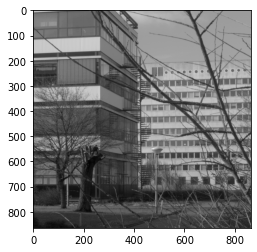

In [221]:
f = '/home/matias/Dropbox/Drop-IdV/STIMS_pert/fipwrc_6imgs&grey_1200reps/images/image_1_data.npy'
a=load(f)
imshow(a[:,::-1].T,cmap='gray')
np.amax(a),np.amin(a),np.mean(a),a.shape

(0.003937007874015748, -0.003937007874015748, -5.021693716856826e-06)

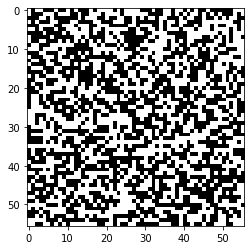

In [111]:
f = '/home/matias/Dropbox/Drop-IdV/STIMS_pert/fipwrc_6imgs&grey_1200reps/patterns/pattern_5_data.npy'
a=load(f)
imshow(a[:,::-1].T,cmap='gray')
np.amax(a),np.amin(a),np.mean(a)

In [6]:
UNSORTED=False
pkls = []
pknames = []
pkcount=0

pkldirs = '/media/samuele/Samuele_01/Salamander1/s1200/'
#here the folder were the pickles of the s1200 rasters are

#-----------------------------------------------
# Here I load all the pickles names
# we make the list of names, and the list of address to open
#-----------------------------------------------

pks = getfiles(startdir=pkldirs, phrase='.pkl', function='endswith')
for pk in pks:
    pkls.append(pk)

pkls = sorted(pkls)

for pk in pkls[:]:
    if UNSORTED:
        pknames.append((pk.split('/')[-1].split('_UNSORTED_s1200_times.pkl')[0]))
    else:
        pknames.append((pk.split('/')[-1].split('_s1200_times.pkl')[0]))
        

pkcount = len(pkls)
print(pkcount)   
pknames[38:]

#-----------------------------------------------
# Here I load all the pertrubation folder
#-----------------------------------------------
patFolder = '/media/samuele/BC_Samuele/20190523_goodone/stimuli/fi_merge/fi_merge_fipwrc_patterns/'
    
pknames

27


['exp101_m5_c815',
 'exp101_m5_c816',
 'exp101_m5_c817',
 'exp101_m5_c821',
 'exp101_m5_c823',
 'exp101_m5_c842',
 'exp101_m5_c850',
 'exp101_m5_c857',
 'exp101_m5_c865',
 'exp101_m5_c868',
 'exp101_m5_c869',
 'exp101_m5_c871',
 'exp101_m5_c883',
 'exp101_m5_c886',
 'exp101_m5_c887',
 'exp101_m5_c888',
 'exp101_m5_c889',
 'exp101_m5_c892',
 'exp101_m5_c894',
 'exp101_m5_c903',
 'exp101_m5_c905',
 'exp101_m5_c907',
 'exp101_m5_c913',
 'exp101_m5_c914',
 'exp101_m5_c915',
 'exp101_m5_c916',
 'exp101_m5_c917']

In [27]:
patFolder

'/media/eqs8/BC_Samuele/20190524/stimuli/fi_merge/fi_merge_fipwrc_patterns/'

In [7]:

exp=101
date = '20210205-'
date=''

N_imgs=4

# if exp>10: 
#     stimF ='/media/eqs8/Samuele_01/Exp_11/stimuli/20210205-FI_MERGE/20210205-fi_merge_ml50_std25/' + date + 'fi_merge_'
#     stim_index=1

stimF ='/media/samuele/BC_Samuele/20190523_goodone/stimuli/fi_merge/'
stim_index=4    #measurement -1
#-----------------
# Get start times and make rasters
#-----------
# Get stim trials

stim_trials_f= open(stimF + 'fi_merge_fipwrc_trials.csv')
stim_trials_f = csv.reader(stim_trials_f,delimiter=",")

stim_trials=[]
for row in stim_trials_f:
    stim_trials.append(np.array(row))

stim_trials_head = stim_trials[0]
stim_trials = np.array(stim_trials[1:]).astype(double)
print(stim_trials_head)


#-------------------------------
#convert to times with trigtimes
trigs = Trigs[stim_index]

if exp==11 and stim_index==1:   # missing trials in the end
    trigs = np.concatenate((Trigs[1], -np.ones((301429-(Trigs[stim_index].shape)[0])))) #froze fix


for st in stim_trials:
    st[2]=trigs[int(st[2])]
    st[3]=trigs[int(st[3])+1]

#stim_trials[:,2]=stim_trials[:,2]/frate
#stim_trials[:,3]=(stim_trials[:,3]+1)/frate

#-----------
# Get conditions

stimF ='/media/samuele/BC_Samuele/20190523_goodone/stimuli/fi_merge/' + date 

stim_cond_f= open(stimF + 'fi_merge_fipwrc_conditions.csv')
stim_cond_f = csv.reader(stim_cond_f,delimiter=",")

stim_cond={}
stim_pattern={}
c=0
for row in stim_cond_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        stim_cond[row[0]]= int(row[1])
        stim_pattern[row[0]]=int(row[2])

print(stim_cond_head)

#---------------------
# Get images start times and pert_nb

pert_nb = np.zeros([N_imgs,1200])
im_starts= np.zeros([N_imgs,1200])
im_patterns=np.zeros([N_imgs,1200])

im_count = np.zeros(N_imgs,dtype='int')

for stim in stim_trials:
    condition = int(stim[1])
    im_nb =  int(stim_cond[str(condition)])
    pattern = int(stim_pattern[str(condition)])

    im_starts[im_nb,im_count[im_nb]] = stim[2]

    im_patterns[im_nb,im_count[im_nb]]= pattern
    
    im_count[im_nb]+=1

    

['' 'condition_nb' 'start_display_nb' 'end_display_nb']
['', 'image_nb', 'pattern_nb']


In [11]:
PDF_folder = '/media/samuele/Samuele_01/Salamander1/temp'
#RF_fit_folder = '/media/samuele/Samuele_01/Salamander2/RF_m2/'   #i don't have it for exp 101

PLOT=False
ZOOM = True
SKIP=False
plot_here=False

t_start = 0.03   # window start to count spikes
t_end = 0.05     # window end to count spikes


meas_RF_fit = 2#[1,5]

codename = 'exp'+str(exp)+'_m'+str(meas_RF_fit)+ '_RF_fit' 
#RF_fit,sharpval = load_obj(RF_fit_folder +codename)

clus = 1009      # cluster unit to plot when skipping

Images =preLoadImgs(exp)
#------------------------
#visualization  tricks
ellipse_resize= 1. #0000000000001     # resize ellipse from checkerboard RF
expon_treat= 2         # exponentiate lsta to sharpen it
zoom_size = 8#16         # zoom around check RF center 
vmax_thresh = .5        # set max visualization scale saturation
put_to0 = 0.          # put to 0 values below a percentage of max after treatment 

cmap = 'gray'          # visualization colors
# cmap='bwr'

interp='gaussian'      # visualization method
interp='nearest'
interp='bicubic'
# interp='bilinear'
# interp = 'hamming'
# interp='none'
# methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16','spline36', 'hanning', 'hamming', 
#            'hermite', 'kaiser', 'quadric','catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
#------------------------
if exp>100:
    check_resize_factor =  21/(864/57)            #56/50   # RF and LSTA are on checkerboard coordinates
                                                # have to resize according to pixel size of each check
    #image_translation = +(21*3)       / 21           # in check units of lsta
    image_translation = (-93)  / (864/57)           # in check units of lsta
    patim_size = 56 
# coor_new = (coor - [0.5,0.5]) *check_resize_factor + [0.5,0.5] + [image_translation,image_translation]
# Xell = ((Xell-(coor[0]))*ellipse_resize )*check_resize_factor + coor_new[0] 
else:
    if exp>=14:  
        check_resize_factor = 1                       #
        image_translation = 72       / 12           # in check units of lsta (72px decalage/#pixpercheck)
        patim_size = 72
 

    if exp>10 and exp<14:
        check_resize_factor = (864/73) / 12                       #73/60
        image_translation = 72       / (864/73)           # in check units of lsta (72px decalage/#pixpercheck)
        patim_size = 72


nb_rep = 1200
frate = 40
print('N rep: ',nb_rep)
raster_len = 0.6

plotcount=0
#-------------------------------------    
picklename = 'exp'+str(exp)+'_m'+str(stim_index+1)+'_c'+str(clus)

if SKIP:
    i0=np.where(np.array(pknames)==picklename)[0][0]
    iz=i0+1
else:
    i0=0
    iz=len(pknames)    
#-------------------------------------    
# start loop
i=i0
for pk in pkls[i0:iz]:
    #print(i)
    clus=pknames[i]
        
#     if not(clus.split('_')[0][3:]==str(exp)):
#         i+=1
#         continue
    
    print('cluster ',clus)
    #Get raster_times
    raster = load_obj(pk)
    
    spcount = np.zeros([N_imgs],dtype='int')
    lsta=np.zeros([N_imgs,patim_size,patim_size])

    #----------------------
    # figure
    extra=4
    if PLOT:
        
#         fig = figure(figsize=(14,10))
#         subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
        
        fig = plt.figure(figsize=(14,16))
        outer_grid = gridspec.GridSpec(6, 4, wspace=0.6, hspace=0.5)
    #----------------------
            
            
        inner_grid = gridspec.GridSpecFromSubplotSpec(4,4,subplot_spec=outer_grid[0:-extra], wspace=0.1, hspace=0.1) 
    shiftim=0
    for im in np.arange(N_imgs):
                
        for pat in np.arange(nb_rep):
            #-----------------
            #load pattern
            pat_nb = int(im_patterns[im,pat])
            pat_img_file = patFolder + 'pattern_'+str(pat_nb)+'_data.npy'
            pat_img = load(pat_img_file)
            pat_img = pat_img[::-1,:]    # this is to load the patterns with the correct orientation!!!!!!!!!
            #-----------------
            
            spcount_imrep = len( raster[pat][ (raster[pat]>=0.6*im+t_start) & (raster[pat]<0.6*(im+1)-0.3+t_end) ] )
            lsta[im]+=pat_img * spcount_imrep
            spcount[im]+=spcount_imrep
            
            
        lsta[im]=np.divide(lsta[im],spcount[im])
        
        #--------------------------------
        # sharpen lsta with exponential
        if expon_treat%2==1: 
            lsta[im]=lsta[im]**expon_treat
        else:
            lsta[im]=lsta[im]**expon_treat*sign(lsta[im])
        #--------------------------------
        # set max threshold for visualization
        vmax= np.max([np.amax(lsta[im]),-np.amin(lsta[im])])  *vmax_thresh
        
        if PLOT:
            
            ax = Subplot(fig, inner_grid[im*2+3])     
#             ax =fig.add_subplot(4,6,im*3+2)
#             ax1 =fig.add_subplot(4,6,im*3+3)
                        
            lsta[im][abs(lsta[im])<vmax*put_to0]=0
            ax.imshow(lsta[im],cmap=cmap,vmax=vmax,vmin=-vmax,interpolation=interp)
            
                 
            ax.set_xticks([])
            ax.set_yticks([])
#             ax1.set_xticks([])
#             ax1.set_yticks([])
            clus_nb = int(clus.split('_c')[1])
                                    
            coor = (np.array(RF_fit[clus_nb][0]))     
            Xell,Yell= (np.array((RF_fit[clus_nb][1])))      
            
            #-------------------------------------------
            # resize and convert to python coordinates
            #-------------------------------------------
            # top left corner in Matlab is: 0.5,0.5
            # in matlab is -0.5,-0.5. Have to shift, resize. And then reshift (inversion was done at RF_fit step)
                        
            coor_new = (coor - [0.5,0.5]) *check_resize_factor + [0.5,0.5] + [image_translation,image_translation]
                
            Xell = ((Xell-(coor[0]))*ellipse_resize )*check_resize_factor + coor_new[0]        
            Yell = ((Yell-(coor[1]))*ellipse_resize )*check_resize_factor + coor_new[1]     
            #-------------------------------------------

            ax.plot(Xell,Yell,'y',lw=5,alpha=0.4)             
            ax1.plot(Xell,Yell,'y',lw=5,alpha=0.4)         
            
            ax.plot(coor_new[0],coor_new[1],'+',markersize=5,color='w')    
            
            if ZOOM:
                shift= zoom_size  -0.5             # shifting 0.5 for python coordinates
                x0 =coor_new[0]
                y0 = coor_new[1]
#                 if ellipse_resize>1:
#                     x0=32-0.5
#                     y0=32-0.5
                ax.set_xlim([x0-shift,x0+shift])
                ax.set_ylim([y0+shift,y0-shift])
#                 ax1.set_xlim([x0-shift,x0+shift])
#                 ax1.set_ylim([y0+shift,y0-shift])
                
            fig.add_subplot(ax)
            
                
            if  im==1 or im==0:
                
                
                t_text = 'LSTA'
                ax.set_title(t_text)

                
            PlotImg(fig,im,Xell,Yell,x0,y0,ZOOM,zoom_size,Images[im],inner_grid,check_size=864/57)    
            t_text = '     Expon_treat '+str(expon_treat)+' - vmax_thres '+str(vmax_thresh) + ' - Interp '+interp + ' - t0,tf '+str([t_start,t_end+0.3])
            fig.suptitle(pknames[i] + t_text,size=20)
    ###############################
    if PLOT:
        inner_grid = gridspec.GridSpecFromSubplotSpec(6,4,subplot_spec=outer_grid[0:-extra], wspace=0.1, hspace=0.1)
        PlotTemp(fig,RF_fit[clus_nb][3],1)
        
        inner_grid = gridspec.GridSpecFromSubplotSpec(4,4,subplot_spec=outer_grid[0:-extra], wspace=0.1, hspace=0.1)
        vmaxRF=0.5
        #interpRF='nearest'
        #interpRF='gaussian'
        interpRF='bicubic'
        #interp='bessel'
        
        x0,y0 = (np.array(RF_fit[clus_nb][0])) 
        Xell,Yell= (np.array((RF_fit[clus_nb][1]))) 
        PlotRF(fig,RF_fit[clus_nb][2],Xell,Yell,x0,y0,ZOOM,zoom_size/check_resize_factor,Images[im],inner_grid,vmaxRF,interpRF,check_size=56)
#         fig = figure(figsize=(14,10))0) 
        
        inner_grid = gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=outer_grid[20:24], wspace=0.5, hspace=0.2)
        PlotRaster(fig,inner_grid,raster,raster)
        

    #------------------------
    # save lsta
    saveF = '/media/samuele/Samuele_01/Salamander1/temp/'
    #codename = 'exp'+str(exp)+'_m'+str(stim_index+1)+'_c' +str(clus)
    savef = saveF + clus  +'_s1200_LSTAs'  
    save_obj(lsta,savef)
    
    #------------------------                    
    if PLOT:

        
        #print('plotting')
        addtxt=''
        if UNSORTED: addtxt = '_UNSORTED'
            
        if ZOOM:
            if ellipse_resize == 1:
                fsave = PDF_folder + '/' +str(clus) +'_s1200_lsta_zoom' +addtxt
            else:
                fsave = PDF_folder + '_zoom' '/' +str(clus) +'_s1200_lsta_zoom' +addtxt
        else:
            fsave = PDF_folder + '/' +str(clus) +'_s1200_lsta' +addtxt
        fig.savefig(fsave+'.png',format='png',dpi=110)
        if not(plot_here):close(fig)  
        plotcount+=1
        
        #if plotcount>149:break      # cannot plot more than 150, if not kernel dies
        
    i+=1
print('Done!')

N rep:  1200
cluster  exp101_m5_c815
cluster  exp101_m5_c816
cluster  exp101_m5_c817
cluster  exp101_m5_c821
cluster  exp101_m5_c823
cluster  exp101_m5_c842
cluster  exp101_m5_c850
cluster  exp101_m5_c857
cluster  exp101_m5_c865
cluster  exp101_m5_c868
cluster  exp101_m5_c869
cluster  exp101_m5_c871
cluster  exp101_m5_c883
cluster  exp101_m5_c886
cluster  exp101_m5_c887
cluster  exp101_m5_c888
cluster  exp101_m5_c889
cluster  exp101_m5_c892
cluster  exp101_m5_c894
cluster  exp101_m5_c903
cluster  exp101_m5_c905
cluster  exp101_m5_c907
cluster  exp101_m5_c913
cluster  exp101_m5_c914
cluster  exp101_m5_c915
cluster  exp101_m5_c916
cluster  exp101_m5_c917
Done!


(4, 56, 56)

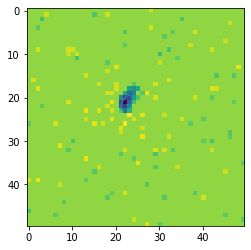

In [91]:
imshow(RF_fit[clus_nb][2])
plot(Xell,Yell)
lsta.shape

In [29]:
i0=0
iz=len(pknames)
for pk in pkls[i0:iz]:
    print(i)
    clus=pknames[i]
    print(clus)
    i+=1

172


IndexError: list index out of range

In [26]:
pknames

['exp11_m2_c103',
 'exp11_m2_c104',
 'exp11_m2_c105',
 'exp11_m2_c107',
 'exp11_m2_c109',
 'exp11_m2_c111',
 'exp11_m2_c113',
 'exp11_m2_c116',
 'exp11_m2_c120',
 'exp11_m2_c122',
 'exp11_m2_c125',
 'exp11_m2_c126',
 'exp11_m2_c12',
 'exp11_m2_c133',
 'exp11_m2_c134',
 'exp11_m2_c137',
 'exp11_m2_c138',
 'exp11_m2_c142',
 'exp11_m2_c144',
 'exp11_m2_c145',
 'exp11_m2_c146',
 'exp11_m2_c149',
 'exp11_m2_c14',
 'exp11_m2_c153',
 'exp11_m2_c154',
 'exp11_m2_c157',
 'exp11_m2_c159',
 'exp11_m2_c15',
 'exp11_m2_c161',
 'exp11_m2_c164',
 'exp11_m2_c165',
 'exp11_m2_c167',
 'exp11_m2_c168',
 'exp11_m2_c170',
 'exp11_m2_c172',
 'exp11_m2_c178',
 'exp11_m2_c180',
 'exp11_m2_c181',
 'exp11_m2_c183',
 'exp11_m2_c185',
 'exp11_m2_c187',
 'exp11_m2_c188',
 'exp11_m2_c18',
 'exp11_m2_c191',
 'exp11_m2_c193',
 'exp11_m2_c197',
 'exp11_m2_c199',
 'exp11_m2_c200',
 'exp11_m2_c205',
 'exp11_m2_c207',
 'exp11_m2_c20',
 'exp11_m2_c212',
 'exp11_m2_c214',
 'exp11_m2_c215',
 'exp11_m2_c217',
 'exp11_m2_c218

In [27]:
len(pknames)

172

In [74]:
PDF_folder = rootf +'/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/OUTPUT_pert/LSTAs/s1200'
RF_fit_folder = rootf+ '/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_RF_fit/'

PLOT=True
ZOOM = True
SKIP=True
meas_RF_fit = [5]#[1,5]

codename = 'exp'+str(exp)+'_m'+str(meas)+ '_RF_fit' 
RF_fit,sharpval = load_obj(RF_fit_folder +codename)

clus = 108       # cluster unit to plot when skipping
clus = 175
clus=738
clus=703
clus=223

#------------------------
#visualization  tricks
ellipse_resize= 1      # resize ellipse from checkerboard RF
expon_treat= 2         # exponentiate lsta to sharpen it
zoom_size = 12         # zoom around check RF center 
vmax_thresh = .5        # set max visualization scale saturation
put_to0 = 0.          # put to 0 values below a percentage of max after treatment 

cmap = 'gray'          # visualization colors
# cmap='bwr'

interp='gaussian'      # visualization method
interp='nearest'
interp='bicubic'
# interp='bilinear'
# interp = 'hamming'
# interp='none'
# methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16','spline36', 'hanning', 'hamming', 
#            'hermite', 'kaiser', 'quadric','catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
#------------------------
   
if exp>10 or exp<14:
    check_resize_factor = (864/73) / 12                       #73/60
    image_translation = 72       / (864/73)           # in check units of lsta (72px decalage/#pixpercheck)
    patim_size = 72
    
if exp<=10:
    check_resize_factor = (864/57) / 21           #56/50   # RF and LSTA are on checkerboard coordinates
                                                # have to resize according to pixel size of each check
    image_translation = -93       / 21           # in check units of lsta
    patim_size = 56


nb_rep = 1200
frate = 40
print('N rep: ',nb_rep)
raster_len = 0.6

#-------------------------------------    
picklename = 'exp'+str(exp)+'_m'+str(stim_index+1)+'_c'+str(clus)
if SKIP:
    i0=np.where(np.array(pknames)==picklename)[0][0]
    iz=i0+1
else:
    i0=0
    iz=len(pknames)
#-------------------------------------    
# start loop
i=i0
for pk in pkls[i0:iz]:
    
    clus=pknames[i]
        
    if not(clus.split('_')[0][3:]==str(exp)):
        i+=1
        continue
    
    print('cluster ',clus)
    #Get raster_times
    raster = load_obj(pk)
    
    spcount = np.zeros([7],dtype='int')
    lsta=np.zeros([7,patim_size,patim_size])
    #----------------------
    # figure
    if PLOT:
        fig = figure(figsize=(10,10))
        subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
    #----------------------
    shiftim=0
    for im in np.arange(7):
        if im==1:shiftim=2
        ax =fig.add_subplot(3,3,im+1+shiftim)
#         ax =fig.add_subplot(1,1,1)
        
        #for pat in np.arange(nb_rep):
        for pat in np.arange(0,1200):
            #-----------------
            #load pattern
            pat_nb = int(im_patterns[im,pat])
            pat_img_file = patFolder + 'pattern_'+str(pat_nb)+'_data.npy'
            pat_img = load(pat_img_file)
            pat_img = pat_img[:,::-1].T
            #-----------------
            
            spcount_imrep = len( raster[pat][ (raster[pat]>=0.6*im+0.03) & (raster[pat]<0.6*(im+1)-0.3+0.05) ] )
#             print(spcount_imrep)
            lsta[im]+=pat_img * spcount_imrep
            
            spcount[im]+=spcount_imrep
            
        lsta[im]=np.divide(lsta[im],spcount[im])
        
        #--------------------------------
        # sharpen lsta with exponential
        if expon_treat%2==1: 
            lsta[im]=lsta[im]**expon_treat
        else:
            lsta[im]=lsta[im]**expon_treat*sign(lsta[im])
        #--------------------------------
        # set max threshold for visualization
        vmax= np.max([np.amax(lsta[im]),-np.amin(lsta[im])])  *vmax_thresh
        
        if PLOT:
            lsta[im][abs(lsta[im])<vmax*put_to0]=0
            ax.imshow(lsta[im],cmap=cmap,vmax=vmax,vmin=-vmax,interpolation=interp)
        
            ax.set_xticks([])
            ax.set_yticks([])
            clus_nb = int(clus.split('_c')[1])
            
                        
            coor = (np.array(RF_fit[clus_nb][0])) 
            Xell,Yell= (np.array((RF_fit[clus_nb][1]))) 
            
            #-------------------------------------------
            # resize and convert to python coordinates
            #-------------------------------------------
            # top left corner in Matlab is: 0.5,0.5
            # in matlab is -0.5,-0.5. Have to shift, resize. And then reshift (inversion was done at RF_fit step)
                        
            coor_new = (coor - [0.5,0.5]) *check_resize_factor + [0.5,0.5] + [image_translation,image_translation]
                        
                
            Xell = ((Xell-(coor[0]))*ellipse_resize )*check_resize_factor + coor_new[0]
            Yell = ((Yell-(coor[1]))*ellipse_resize )*check_resize_factor + coor_new[1]
            
            #-------------------------------------------
            
            ax.plot(Xell,Yell,'y',lw=5,alpha=0.4)
            #ax.plot(coor_new[0],coor_new[1],'+',markersize=5,color='w')
            
            if ZOOM:
                shift= zoom_size  -0.5             # shifting 0.5 for python coordinates
                x0 =coor_new[0]
                y0 = coor_new[1]
                ax.set_xlim([x0-shift,x0+shift])
                ax.set_ylim([y0+shift,y0-shift])
                
                
#         ax.imagesc(Spatial(:,:,i))plot(coor[0],coor[1],'+',markersize=5,color='k')

    #------------------------
    # save lsta
#     saveF = rootf+ '/matias/Dropbox/Drop-IdV/git-Perturbation/pyretina/analysis/pert_DATA/pckls_s600_times/'
#     codename = 'exp'+str(exp)+'_m'+str(stim_index+1)+'_c' +str(clus)
#     savef = saveF + codename  +'_s600_times'  
#     save_obj(ch_raster,savef)
    
    #------------------------                    
    if PLOT:
        ax =fig.add_subplot(3,3,1)
        t_text = 'Expon_treat '+str(expon_treat)+' - vmax_thres '+str(vmax_thresh) + ' - Interp '+interp
        ax.set_title(t_text)
        
        print('plotting')
        addtxt=''
        if UNSORTED: addtxt = '_UNSORTED'
            
        if ZOOM:
            if ellipse_resize == 1:
                fsave = PDF_folder + '_zoom1' '/' +str(clus) +'_s1200_lsta_zoom' +addtxt
            else:
                fsave = PDF_folder + '_zoom' '/' +str(clus) +'_s1200_lsta_zoom' +addtxt
        else:
            fsave = PDF_folder + '/' +str(clus) +'_s1200_lsta' +addtxt
        fig.savefig(fsave+'.png',format='png',dpi=110)
        close(fig)  
        
    i+=1
    

N rep:  1200
cluster  exp13_m2_c223
plotting


<ipython-input-74-c66c59fd3f2d>:169: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax =fig.add_subplot(3,3,1)


In [34]:
check_resize_factor

0.9863013698630136

In [29]:
pat_img.shape


(56, 56)

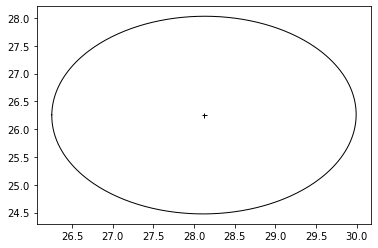

In [50]:
figure()
plot((np.array((RF_fit[clus_nb][1])))[0],(np.array((RF_fit[clus_nb][1])))[1] ,'k',lw=1)
plot(coor[0],coor[1],'+',markersize=5,color='k')

In [154]:
len(RF_fit.keys())

163

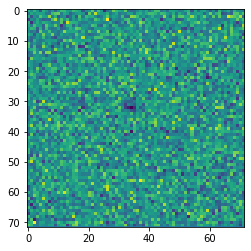

In [48]:
figure()
imshow(lsta[im])

axhline(71.5)

In [210]:
len(RF_fit),picklename,pknames
fsave

'/home/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/OUTPUT_pert/LSTAs/s1200/exp4_m3_c296_s1200_lsta_UNSORTED'

In [51]:
trigs = Trigs[stim_index]
if exp==11 and stim_index==1: trigs = np.concatenate((Trigs[1], -np.ones((301429-(Trigs[stim_index].shape)[0])))) #froze fixpknames
picklename

'exp1_m3_c183'

# Make LSTA s600

In [64]:
pkls = []
pknames = []
pkcount=0

pkldirs = rootf + '/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_s600_times/'

#-----------------------------------------------
# Here I load all the pickles names
# we make the list of names, and the list of address to open
#-----------------------------------------------

pks = getfiles(startdir=pkldirs, phrase='.pkl', function='endswith')
for pk in pks:
    pkls.append(pk)

pkls = sorted(pkls)

for pk in pkls[:]:
    pknames.append((pk.split('/')[-1].split('_s600_times.pkl')[0]))

pkcount = len(pkls)
print(pkcount)   
pknames[38:]

#-----------------------------------------------
# Here I load all the pertrubation folder
#-----------------------------------------------
patFolder = rootf + '/matias/Dropbox/Drop-IdV/STIMS_pert/fipwrc_6imgs&grey_1200reps/patterns/'
if exp>10: patFolder = rootf + '/matias/Dropbox/Drop-IdV/STIMS_pert/20210205-fipwrc_12imgs_600reps_ml50_std25_amp32/patterns/'

329


In [65]:
stim_index = 7   # measurement number -1
if exp>10: stim_index=3
#-----------------
# Get start times and make rasters
#-----------
# Get stim trials
stimF = rootf + '/matias/Dropbox/Drop-IdV/STIMS_pert/fipwrc_12imgs_600reps//'

if exp>10: 
    stimF = rootf + '/matias/Dropbox/Drop-IdV/STIMS_pert/20210205-fipwrc_12imgs_600reps_ml50_std25_amp32/' + date  

stim_trials_f= open(stimF + 'fipwrc_trials.csv')
stim_trials_f = csv.reader(stim_trials_f,delimiter=",")

stim_trials=[]
for row in stim_trials_f:
    stim_trials.append(np.array(row))

stim_trials_head = stim_trials[0]
stim_trials = np.array(stim_trials[1:]).astype(double)
print(stim_trials_head)


#-------------------------------
#convert to times with trigtimes
trigs = Trigs[stim_index]

for st in stim_trials:
    st[2]=trigs[int(st[2])]
    st[3]=trigs[int(st[3])+1]

#stim_trials[:,2]=stim_trials[:,2]/frate
#stim_trials[:,3]=(stim_trials[:,3]+1)/frate

#-----------
# Get conditions

stim_cond_f= open(stimF + 'fipwrc_conditions.csv')
stim_cond_f = csv.reader(stim_cond_f,delimiter=",")

stim_cond={}
stim_pattern={}
c=0
for row in stim_cond_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        stim_cond[row[0]]= int(row[1])-7
        stim_pattern[row[0]]=int(row[2])

print(stim_cond_head)

#---------------------
# Get images start times and pert_nb

pert_nb = np.zeros([12,600])
im_starts= np.zeros([12,600])
im_patterns=np.zeros([12,600])

im_count = np.zeros(12,dtype='int')

for stim in stim_trials:
    condition = int(stim[1])
    im_nb =  int(stim_cond[str(condition)])
    pattern = int(stim_pattern[str(condition)])

    im_starts[im_nb,im_count[im_nb]] = stim[2]
    im_patterns[im_nb,im_count[im_nb]]= pattern

    im_count[im_nb]+=1


['' 'condition_nb' 'start_display_nb' 'end_display_nb']
['', 'image_nb', 'pattern_nb']


In [67]:
PDF_folder = rootf +'/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/OUTPUT_pert/LSTAs/s600'
RF_fit_folder = rootf+ '/matias/Dropbox/Drop-IdV/git-Perturbation/analysis/pert_DATA/pckls_RF_fit/'

PLOT=True
ZOOM = True
SKIP=True
meas_RF_fit = 1  #[1,5]

codename = 'exp'+str(exp)+'_m'+str(meas)+ '_RF_fit' 
RF_fit,sharpval = load_obj(RF_fit_folder +codename)

clus = 108       # cluster unit to plot when skipping
clus = 175
clus=738
clus=703
clus=3

#------------------------
#visualization  tricks
ellipse_resize= 2.5      # resize ellipse from checkerboard RF
expon_treat= 2         # exponentiate lsta to sharpen it
zoom_size = 12         # zoom around check RF center 
vmax_thresh = .5        # set max visualization scale saturation
put_to0 = 0.          # put to 0 values below a percentage of max after treatment 

cmap = 'gray'          # visualization colors
# cmap='bwr'

interp='gaussian'      # visualization method
interp='nearest'
interp='bicubic'
# interp='bilinear'
# interp = 'hamming'
# interp='none'
# methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16','spline36', 'hanning', 'hamming', 
#            'hermite', 'kaiser', 'quadric','catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
#------------------------
if exp>10:
    check_resize_factor = 73/60
    patim_size = 72
    
else:
    check_resize_factor = 56/50
    patim_size = 56


nb_rep = 600
frate = 40
print('N rep: ',nb_rep)
raster_len = 0.6
#-------------------------------------    
picklename = 'exp'+str(exp)+'_m'+str(stim_index+1)+'_c'+str(clus)
if SKIP:
    i0=np.where(np.array(pknames)==picklename)[0][0]
    iz=i0+1
else:
    i0=90
    iz=len(pknames)
#-------------------------------------    

i=i0
for pk in pkls[i0:iz]:
    
    clus=pknames[i]
        
    if not(clus.split('_')[0][3:]==str(exp)):
        i+=1
        continue
    
    print('cluster ',clus)
    #Get raster_times
    raster = load_obj(pk)
    
    spcount = np.zeros([12],dtype='int')
    lsta=np.zeros([12,patim_size,patim_size])
    #----------------------
    # figure
    if PLOT:
        fig = figure(figsize=(16/6*5,10))
        subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
    #----------------------
    
    for im in np.arange(12):
        
        ax =fig.add_subplot(3,4,im+1)
#         ax =fig.add_subplot(1,1,1)
        
        for pat in np.arange(nb_rep):
            #-----------------
            #load pattern
            pat_nb = int(im_patterns[im,pat])
            pat_img_file = patFolder + 'pattern_'+str(pat_nb)+'_data.npy'
            pat_img = load(pat_img_file)
            pat_img = pat_img[:,::-1].T
            #-----------------
            
            spcount_imrep = len( raster[pat][ (raster[pat]>=0.6*im) & (raster[pat]<0.6*(im+1)-0.3) ] )
#             print(spcount_imrep)
            lsta[im]+=pat_img * spcount_imrep
            
            spcount[im]+=spcount_imrep
            
        lsta[im]=np.divide(lsta[im],spcount[im])
            
                #--------------------------------
        # sharpen lsta with exponential
        if expon_treat%2==1: 
            lsta[im]=lsta[im]**expon_treat
        else:
            lsta[im]=lsta[im]**expon_treat*sign(lsta[im])
        #--------------------------------
        # set max threshold for visualization
        vmax= np.max([np.amax(lsta[im]),-np.amin(lsta[im])])  *vmax_thresh
        
        if PLOT:
            lsta[im][abs(lsta[im])<vmax*put_to0]=0
            ax.imshow(lsta[im],cmap=cmap,vmax=vmax,vmin=-vmax,interpolation=interp)
        
            ax.set_xticks([])
            ax.set_yticks([])
            clus_nb = int(clus.split('_c')[1])
            
                        
            coor = (np.array(RF_fit[clus_nb][0])) 
            Xell,Yell= (np.array((RF_fit[clus_nb][1]))) 
            
            #-------------------------------------------
            # resize and convert to python coordinates
            #-------------------------------------------
            # top left corner in Matlab is: 0.5,0.5
            # in matlab is -0.5,-0.5. Have to shift, resize. And then reshift (inversion was done at RF_fit step)
                        
            coor_new = (coor + [0.5,0.5]) *check_resize_factor - [0.5,0.5]
                        
                
            Xell = ((Xell-(coor[0]))*ellipse_resize )*check_resize_factor + coor_new[0]
            Yell = ((Yell-(coor[1]))*ellipse_resize )*check_resize_factor + coor_new[1]
            
            #-------------------------------------------
            
            ax.plot(Xell,Yell,'y',lw=5,alpha=0.4)
            #ax.plot(coor_new[0],coor_new[1],'+',markersize=5,color='w')
            
            if ZOOM:
                shift= zoom_size  -0.5             # shifting 0.5 for python coordinates
                x0 =coor_new[0]
                y0 = coor_new[1]
                ax.set_xlim([x0-shift,x0+shift])
                ax.set_ylim([y0+shift,y0-shift])
    #------------------------
    # save lsta
#     saveF = rootf+ '/matias/Dropbox/Drop-IdV/git-Perturbation/pyretina/analysis/pert_DATA/pckls_s600_times/'
#     codename = 'exp'+str(exp)+'_m'+str(stim_index+1)+'_c' +str(clus)
#     savef = saveF + codename  +'_s600_times'  
#     save_obj(ch_raster,savef)
    
    #------------------------                    
    if PLOT:
        if ZOOM:
            fsave = PDF_folder + '_zoom' '/' +str(clus) +'_s600_lsta_zoom' 
        else:
            fsave = PDF_folder + '/' +str(clus) +'_s600_lsta' 
        fig.savefig(fsave+'.png',format='png',dpi=110)
        close(fig)  
    i+=1 

N rep:  600
cluster  exp13_m4_c3


In [50]:
i

90